<a href="https://colab.research.google.com/github/rmadrazo97/EITCA-AI-Academy/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Classifier

In [1]:
# Step 1: Import Necessary Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the Fashion MNIST Dataset
# The Fashion MNIST dataset is included in Keras' datasets module. It has 60,000 training images and 10,000 test images, classified into 10 categories.
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Step 3: Preprocess the Data
# Normalize the images to have values between 0 and 1. This makes the training process more stable and efficient.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Step 4: Create the Model
# For a linear classifier, you can use a Flatten layer to convert the 2D image data to 1D, followed by a dense layer with 10 units (one for each class) with a softmax activation function to get probabilities for each class.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Step 5: Compile the Model
# Compile the model with an optimizer, a loss function for multi-class classification, and a metric to monitor for performance.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Step 6: Train the Model
# Train the model using the training data.
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6007 - accuracy: 0.7966
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4620 - accuracy: 0.8429
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4350 - accuracy: 0.8505
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4225 - accuracy: 0.8538
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4135 - accuracy: 0.8563
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4076 - accuracy: 0.8590
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4012 - accuracy: 0.8615
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3976 - accuracy: 0.8616
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3946 - accuracy: 0.8622
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.392

In [8]:
# Step 7: Evaluate the Model
# Evaluate the model on the test dataset to see how well it performs.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4424 - accuracy: 0.8449 - 503ms/epoch - 2ms/step

Test accuracy: 0.8449000120162964


In [9]:
# Step 8: Make Predictions
# You can make predictions on new data using the trained model.
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [12]:
# To get the class label with the highest probability for the first image:
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


In [13]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3897 - accuracy: 0.8644 - val_loss: 0.3831 - val_accuracy: 0.8669
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3869 - accuracy: 0.8663 - val_loss: 0.3983 - val_accuracy: 0.8576
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3857 - accuracy: 0.8652 - val_loss: 0.3845 - val_accuracy: 0.8660
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3824 - accuracy: 0.8663 - val_loss: 0.4099 - val_accuracy: 0.8535
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3817 - accuracy: 0.8660 - val_loss: 0.3949 - val_accuracy: 0.8628
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3804 - accuracy: 0.8670 - val_loss: 0.3888 - val_accuracy: 0.8648
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3793 - accuracy: 0.8674 - val_loss: 0.3970 - val_accuracy:

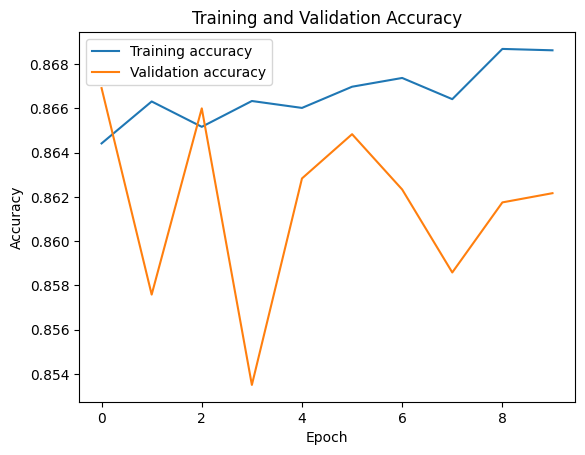

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Deep Classifier

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0


In [16]:
# Step 2: Load and Preprocess the Data
# Load the Fashion MNIST dataset and normalize it.
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
# Step 3: Build the Model
# Create a deeper model by adding more Dense layers. Each Dense layer will have a ReLU activation function, except for the output layer, which will use a softmax activation to output probabilities for the 10 classes.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Step 5: Train the Model
# Train the model and save the training history.
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5174 - accuracy: 0.8173 - val_loss: 0.4270 - val_accuracy: 0.8456
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3815 - accuracy: 0.8609 - val_loss: 0.3707 - val_accuracy: 0.8660
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3383 - accuracy: 0.8768 - val_loss: 0.3470 - val_accuracy: 0.8720
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3145 - accuracy: 0.8830 - val_loss: 0.3535 - val_accuracy: 0.8735
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3010 - accuracy: 0.8888 - val_loss: 0.3499 - val_accuracy: 0.8759
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2850 - accuracy: 0.8954 - val_loss: 0.3407 - val_accuracy: 0.8748
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2708 - accuracy: 0.8988 - val_loss: 0.3355 - val_accuracy:

In [20]:
# Step 6: Evaluate the Model
# Evaluate the model's performance on the test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3621 - accuracy: 0.8762 - 562ms/epoch - 2ms/step

Test accuracy: 0.8762000203132629


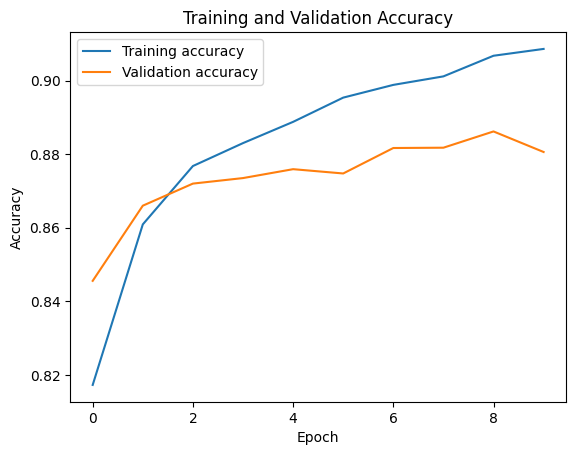

In [21]:
# Step 7: Plot Training and Validation Accuracy
# Plot the training and validation accuracy to visualize how your model has learned.
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [22]:
# Step 8: Make Predictions (Optional)
# You can also use the model to make predictions on the test set.

predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step
